In [1]:
# student performnce

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import pandas as pd

In [4]:
student_df = pd.read_csv("Datasets/StudentsPerformance.csv")

student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
#check for missing values
print("Missing Values")
print(student_df.isnull().sum())

Missing Values
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [11]:
#check different values for columns
student_df["test preparation course"].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [16]:
#Score averages
print("Math Avg")
print(student_df["math score"].mean())

print("Reading Avg")
print(student_df["reading score"].mean())

print("Writing Avg")
print(student_df["writing score"].mean())

Math Avg
66.089
Reading Avg
69.169
Writing Avg
68.054


In [20]:
#correlation
corr = student_df[['math score', 'reading score', 'writing score']].corr()
corr

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


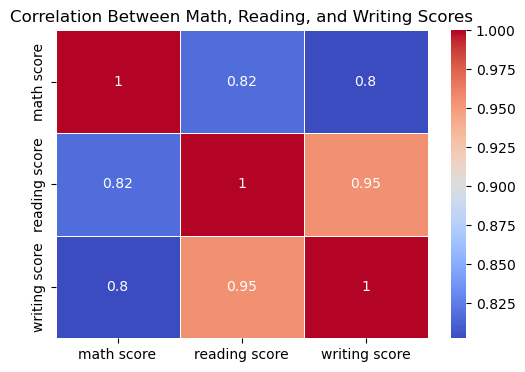

In [81]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Math, Reading, and Writing Scores')

#plt.savefig('average_scores.png', format='png')

plt.show()

#Correlation measures how strongly two variables change together across all individual students — not just their averages.

- A correlation of 1.0 = perfect positive relationship
- A correlation of 0 = no relationship
- A correlation close to -1 = perfect negative relationship

In [54]:
#creating average score
student_df['average score'] = student_df[['math score', 'reading score', 'writing score']].mean(axis=1)

In [55]:
#average scores by gender
print(student_df.groupby('gender')[['math score', 'reading score', 'writing score', 'average score']].mean())
print(student_df["gender"].value_counts())

        math score  reading score  writing score  average score
gender                                                         
female   63.633205      72.608108      72.467181      69.569498
male     68.728216      65.473029      63.311203      65.837483
gender
female    518
male      482
Name: count, dtype: int64


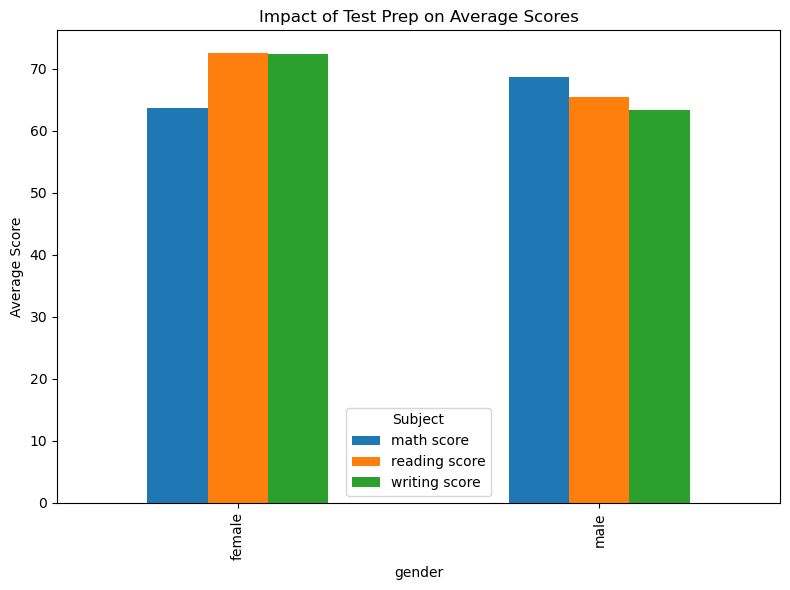

In [67]:
student_df.groupby('gender')[['math score', 'reading score', 'writing score']].mean().plot(kind='bar', figsize=(8,6))
plt.title('Impact of Test Prep on Average Scores')
plt.ylabel('Average Score')
plt.legend(title='Subject')

plt.tight_layout()
plt.show()

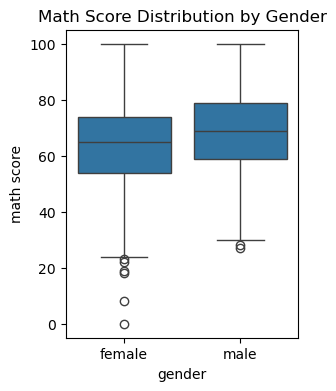

In [49]:
#Box plot for Math scores by gender
plt.figure(figsize=(3, 4))
sns.boxplot(x='gender', y='math score', data=student_df)
plt.title('Math Score Distribution by Gender')
plt.show()


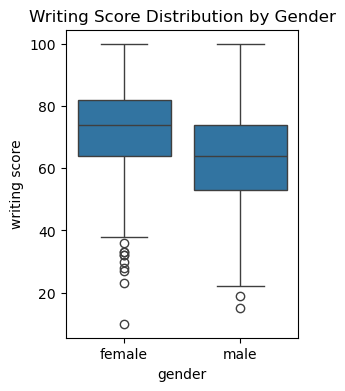

In [50]:
#Box plot for writing scores by gender
plt.figure(figsize=(3, 4))
sns.boxplot(x='gender', y='writing score', data=student_df)
plt.title('Writing Score Distribution by Gender')
plt.show()

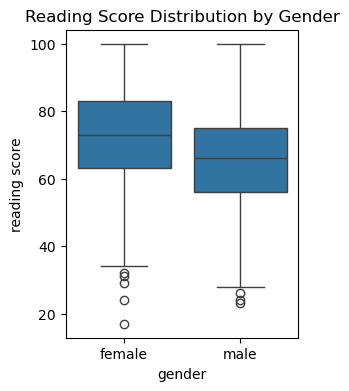

In [51]:
#Box plot for reading scores by gender
plt.figure(figsize=(3, 4))
sns.boxplot(x='gender', y='reading score', data=student_df)
plt.title('Reading Score Distribution by Gender')
plt.show()

In [30]:
#test preparation course averages
print(student_df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean())
print(student_df["test preparation course"].value_counts())

                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673
test preparation course
none         642
completed    358
Name: count, dtype: int64


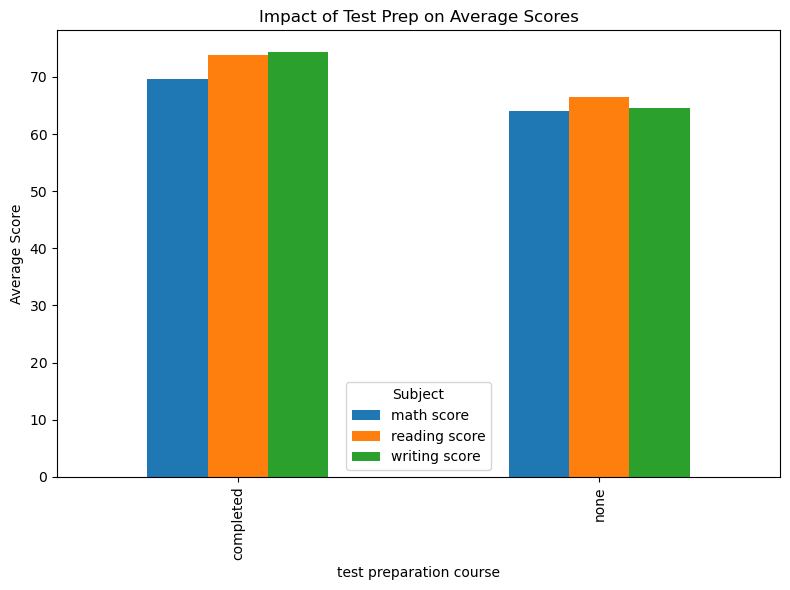

In [61]:
student_df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().plot(kind='bar', figsize=(8,6))
plt.title('Impact of Test Prep on Average Scores')
plt.ylabel('Average Score')
plt.legend(title='Subject')

plt.tight_layout()
plt.show()


In [32]:
#lunch average
print(student_df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean())
print(student_df["lunch"].value_counts())

              math score  reading score  writing score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256
lunch
standard        645
free/reduced    355
Name: count, dtype: int64


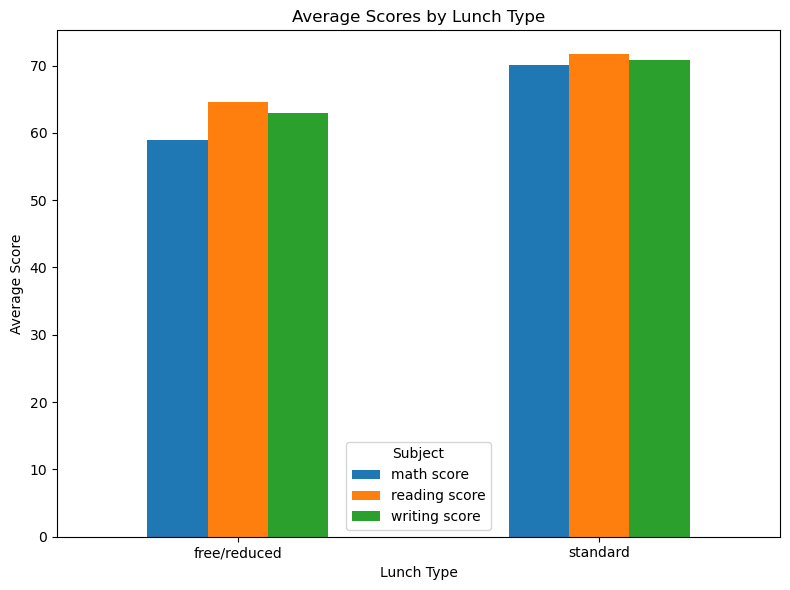

In [59]:
student_df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean().plot(kind='bar', figsize=(8,6))

plt.title('Average Scores by Lunch Type')
plt.ylabel('Average Score')
plt.xlabel('Lunch Type')
plt.xticks(rotation=0)
plt.legend(title='Subject')
plt.tight_layout()
plt.show()

In [70]:
#parent level of education
print(student_df.groupby('parental level of education')[['math score', 'reading score', 'writing score', 'average score']].mean())
print(student_df["parental level of education"].value_counts())


                             math score  reading score  writing score  \
parental level of education                                             
associate's degree            67.882883      70.927928      69.896396   
bachelor's degree             69.389831      73.000000      73.381356   
high school                   62.137755      64.704082      62.448980   
master's degree               69.745763      75.372881      75.677966   
some college                  67.128319      69.460177      68.840708   
some high school              63.497207      66.938547      64.888268   

                             average score  
parental level of education                 
associate's degree               69.569069  
bachelor's degree                71.923729  
high school                      63.096939  
master's degree                  73.598870  
some college                     68.476401  
some high school                 65.108007  
parental level of education
some college          226
a

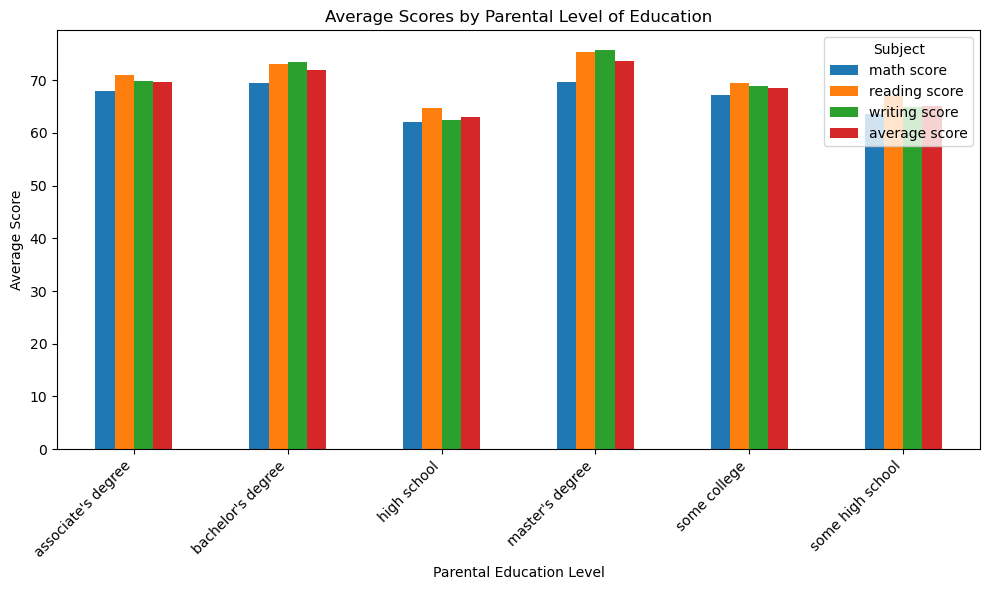

In [69]:
student_df.groupby('parental level of education')[['math score', 'reading score', 'writing score', 'average score']].mean().plot(kind='bar', figsize=(10,6))
plt.title("Average Scores by Parental Level of Education")
plt.ylabel("Average Score")
plt.xlabel("Parental Education Level")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Subject')
plt.tight_layout()
plt.show()


In [34]:
#race/ethnicity
print(student_df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean())
print(student_df["race/ethnicity"].value_counts())


                math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


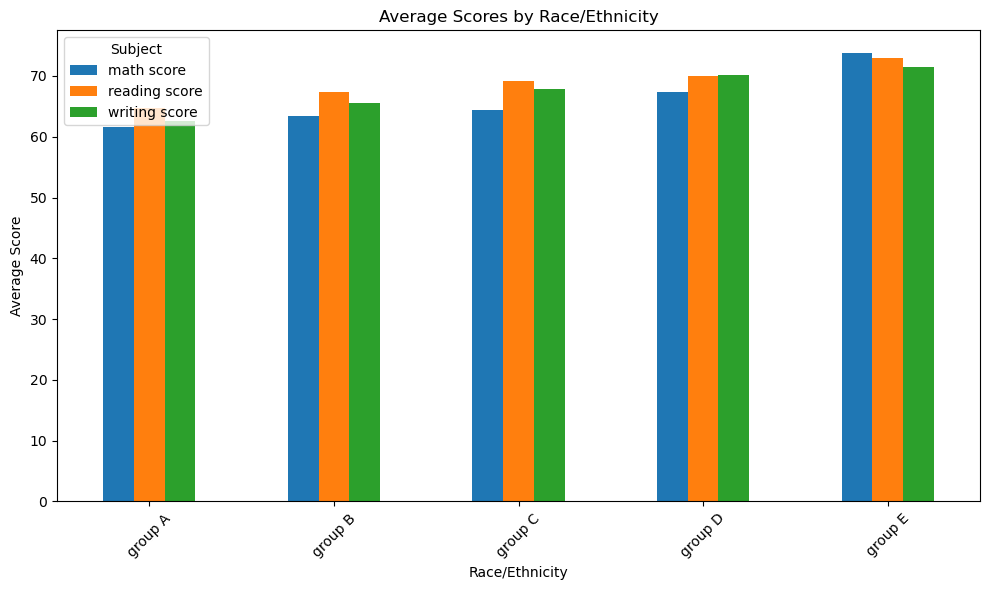

In [35]:
student_df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean().plot(kind='bar', figsize=(10,6))
plt.title('Average Scores by Race/Ethnicity')
plt.ylabel('Average Score')
plt.xlabel('Race/Ethnicity')
plt.xticks(rotation=45)
plt.legend(title='Subject')
plt.tight_layout()
plt.show()


In [72]:
# Map binary category: test preparation
student_df['test prep completed'] = student_df['test preparation course'].map({'none': 0, 'completed': 1})

# Map lunch type
student_df['lunch type'] = student_df['lunch'].map({'standard': 1, 'free/reduced': 0})

#we convert them because these values are not numeric and correlation only works with numeric values.

In [73]:
student_df[['math score', 'reading score', 'writing score', 'test prep completed', 'lunch type']].corr()


,math score,reading score,writing score,test prep completed,lunch type
math score,1.000000,0.817580,0.802642,0.177702,0.350877
reading score,0.817580,1.000000,0.954598,0.241780,0.229560
writing score,0.802642,0.954598,1.000000,0.312946,0.245769
test prep completed,0.177702,0.241780,0.312946,1.000000,-0.017044
lunch type,0.350877,0.229560,0.245769,-0.017044,1.000000


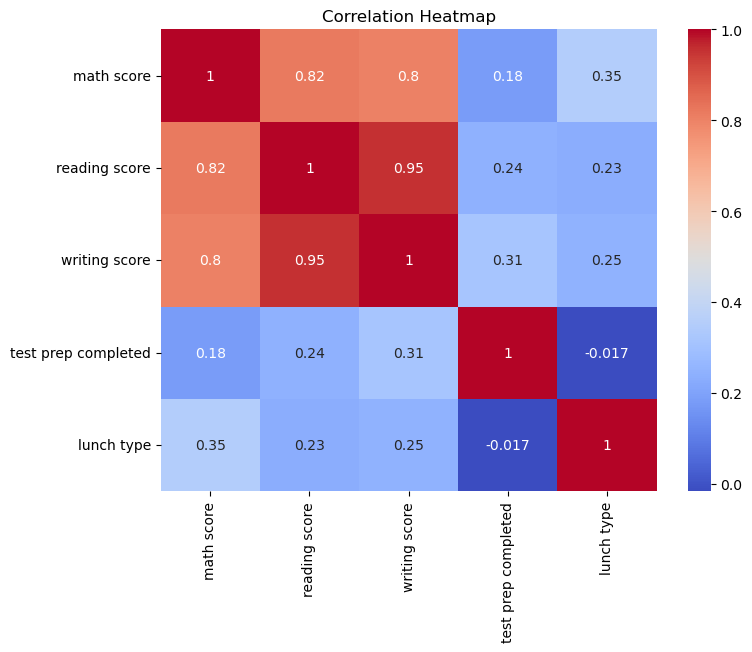

In [74]:
plt.figure(figsize=(8,6))
sns.heatmap(student_df[['math score', 'reading score', 'writing score', 'test prep completed', 'lunch type']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()